<a href="https://colab.research.google.com/github/vietcheems/Project-I/blob/main/Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install and import necessary depependencies

In [ ]:
from google.colab import drive
drive._mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
import chardet
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.feature_selection import SelectFromModel

from matplotlib import pyplot
from numpy import sort

import math



# Create dataframes for stations

## Read separate feature files and convert them into station dataframes


In [ ]:
features = ['year', 'month', 'date','hour', 'pm', 'wind_direct', 'CH4', 'CO', 'Humid', 'Nitrogen_oxide', 'NO',
       'NO2', 'non_methane_hydrocarbons', 'oxidant', 'SO2', 'solar_radiation',
       'Suspended_particulate_matter', 'Temprature', 'total_hydrocacbon',
       'wind_speed']

In [ ]:
df_list = [pd.DataFrame(columns= features) for i in range(40)]
failed = []
base_dir = "/content/drive/MyDrive/data_chiba"
for csv in os.listdir(base_dir):
  if csv.endswith("csv") and not csv.startswith("locations") and not csv.startswith("Preprocess"):
  #if csv == "CO.csv":
    full_path = os.path.join(base_dir, csv)
    print(full_path)
    with open(full_path, 'rb') as f:
      encoding = chardet.detect(f.readline())['encoding']
    try:
      try:
        df = pd.read_csv(full_path, encoding=encoding, usecols=range(45))
        df = df.drop(columns=[df.columns[i] for i in range(44, len(df.columns))], axis=1)
      except Exception as e:
        print(e)
        df = pd.read_csv(full_path, encoding=encoding)
        df = df.drop(columns=[df.columns[i] for i in range(44, len(df.columns))], axis=1)
      for col_i in range(len(df.columns)):
        if col_i < 4:
          continue
        else:
          feature = csv.split(".")[0]
          station_i = col_i - 4
          df_list[station_i][feature] = df[df.columns[col_i]]
    except Exception as e:
      print(e)
      failed.append(csv)

/content/drive/MyDrive/data_chiba/pm.csv
/content/drive/MyDrive/data_chiba/wind_direct.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,8,10,12,14,16,17,18,19,20,21,22,28,29,30,31,32,33,34,35,36,37,38,39,41,43,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/content/drive/MyDrive/data_chiba/CH4.csv
/content/drive/MyDrive/data_chiba/CO.csv
Usecols do not match columns, columns expected but not found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/content/drive/MyDrive/data_chiba/Humid.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,14,15,16,17,18,19,21,22,23,29,30,31,32,33,36,39,40,44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/content/drive/MyDrive/data_chiba/Nitrogen_oxide.csv
/content/drive/MyDrive/data_chiba/NO.csv
/content/drive/MyDrive/data_chiba/NO2.csv
/content/drive/MyDrive/data_chiba/non_methane_hydrocarbons.csv
/content/drive/MyDrive/data_chiba/oxidant.csv
/content/drive/MyDrive/data_chiba/SO2.csv
/content/drive/MyDrive/data_chiba/solar_radiation.csv
Usecols do not match columns, columns expected but not found: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
/content/drive/MyDrive/data_chiba/Suspended_particulate_matter.csv
/content/drive/MyDrive/data_chiba/Temprature.csv
/content/drive/MyDrive/data_chiba/total_hydrocacbon.csv
/content/drive/MyDrive/data_chiba/wind_speed.csv


## Choose the first station for processing

In [ ]:
df = df_list[0].copy()
df

,year,month,date,hour,pm,wind_direct,CH4,CO,Humid,Nitrogen_oxide,NO,NO2,non_methane_hydrocarbons,oxidant,SO2,solar_radiation,Suspended_particulate_matter,Temprature,total_hydrocacbon,wind_speed
0,NaN,NaN,NaN,NaN,10,1,200,3,91,7,0,7,11,12,0,0,19,85,211,7
1,NaN,NaN,NaN,NaN,15,1,201,2,91,5,0,5,11,11,1,0,21,85,212,5
2,NaN,NaN,NaN,NaN,17,16,204,2,92,5,0,5,12,17,1,0,24,84,216,8
3,NaN,NaN,NaN,NaN,16,1,213,2,96,7,0,7,14,18,1,0,27,100,227,15
4,NaN,NaN,NaN,NaN,16,1,213,2,95,7,0,7,15,23,1,0,34,94,228,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40915,NaN,NaN,NaN,NaN,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40916,NaN,NaN,NaN,NaN,-3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40917,NaN,NaN,NaN,NaN,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40918,NaN,NaN,NaN,NaN,-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.to_csv(path_or_buf = "/content/drive/MyDrive/chosen_data/station_1.csv" , sep = ",", index = False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/chosen_data/station_1.csv", sep =",")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Preprocess the first station

## Function to plot the distribution of features

In [ ]:
def plot_distribution(df):
  features = ['pm', 'CH4', 'CO',
       'Humid', 'Nitrogen_oxide', 'NO', 'NO2', 'non_methane_hydrocarbons',
       'oxidant', 'SO2', 'solar_radiation', 'Suspended_particulate_matter',
       'Temprature', 'total_hydrocacbon', 'wind_speed'] 
  features = [[ features[i] for i in range(i,i+3)] for i in [0,3,6,9,12]]
  fig, axes = plt.subplots(nrows = 5,ncols = 3,figsize=(40,30))
  fig.subplots_adjust(wspace=0.25)
  plt.subplots_adjust(hspace = 0.8)
  fig.suptitle('Distribution plots of features',fontsize = 40)
  for i in range(5):
    for j in range(3):
      feature = features[i][j]
      sns.distplot(df[feature], bins = 10, ax = axes[i][j]).set_title(feature,fontsize = 30)


## Function to plot the time series of features

In [ ]:
def plot_series(df):
  features = ['pm', 'CH4', 'CO',
       'Humid', 'Nitrogen_oxide', 'NO', 'NO2', 'non_methane_hydrocarbons',
       'oxidant', 'SO2', 'solar_radiation', 'Suspended_particulate_matter',
       'Temprature', 'total_hydrocacbon', 'wind_speed'] 
  features = [[ features[i] for i in range(i,i+3)] for i in [0,3,6,9,12]]
  fig, axes = plt.subplots(nrows = 5,ncols = 3,figsize=(90,70))
  fig.subplots_adjust(wspace=0.1)
  fig.subplots_adjust(hspace = 0.3)
  fig.suptitle('Time series plots of features',fontsize = 100, y = 0.92, weight = 'bold')
  for i in range(5):
    for j in range(3):
      feature = features[i][j]
      axes[i][j].plot(pd.to_numeric(df[feature]) )
      axes[i][j].set_title(feature, fontsize = 50 )
      #axes[i][j].set(xlabel="Time steps", ylabel= feature, la)
      axes[i][j].set_xlabel('Time step',fontsize= 40)
      axes[i][j].set_ylabel("Value",fontsize= 40)
      axes[i][j].tick_params(axis='both', which='major', labelsize=30)
      axes[i][j].tick_params(axis='both', which='minor', labelsize=30)


## Drop the null rows in our datasets

In [ ]:
#Dropping final null columns
def drop_null_rows(df):
  station = df.dropna(subset = df.columns[5:],how='all')
  return station

In [ ]:
df = drop_null_rows(df)
df

,year,month,date,hour,pm,wind_direct,CH4,CO,Humid,Nitrogen_oxide,NO,NO2,non_methane_hydrocarbons,oxidant,SO2,solar_radiation,Suspended_particulate_matter,Temprature,total_hydrocacbon,wind_speed
0,NaN,NaN,NaN,NaN,10,1,200,3,91,7,0,7,11,12,0,0,19,85,211,7
1,NaN,NaN,NaN,NaN,15,1,201,2,91,5,0,5,11,11,1,0,21,85,212,5
2,NaN,NaN,NaN,NaN,17,16,204,2,92,5,0,5,12,17,1,0,24,84,216,8
3,NaN,NaN,NaN,NaN,16,1,213,2,96,7,0,7,14,18,1,0,27,100,227,15
4,NaN,NaN,NaN,NaN,16,1,213,2,95,7,0,7,15,23,1,0,34,94,228,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,NaN,NaN,NaN,NaN,6,2,196,3,96,5,0,5,5,35,1,0,25,111,201,17
35060,NaN,NaN,NaN,NaN,5,1,195,2,97,6,0,6,4,32,2,0,13,108,199,14
35061,NaN,NaN,NaN,NaN,12,15,196,2,95,9,0,9,4,26,2,0,11,98,200,22
35062,NaN,NaN,NaN,NaN,4,15,198,2,96,6,0,6,5,28,2,0,26,97,203,26


## Fill ** with Nan

In [ ]:
#Fill ** with NAN
def star_to_nan(df):
  return df.replace("**", np.nan)

## Plot time series

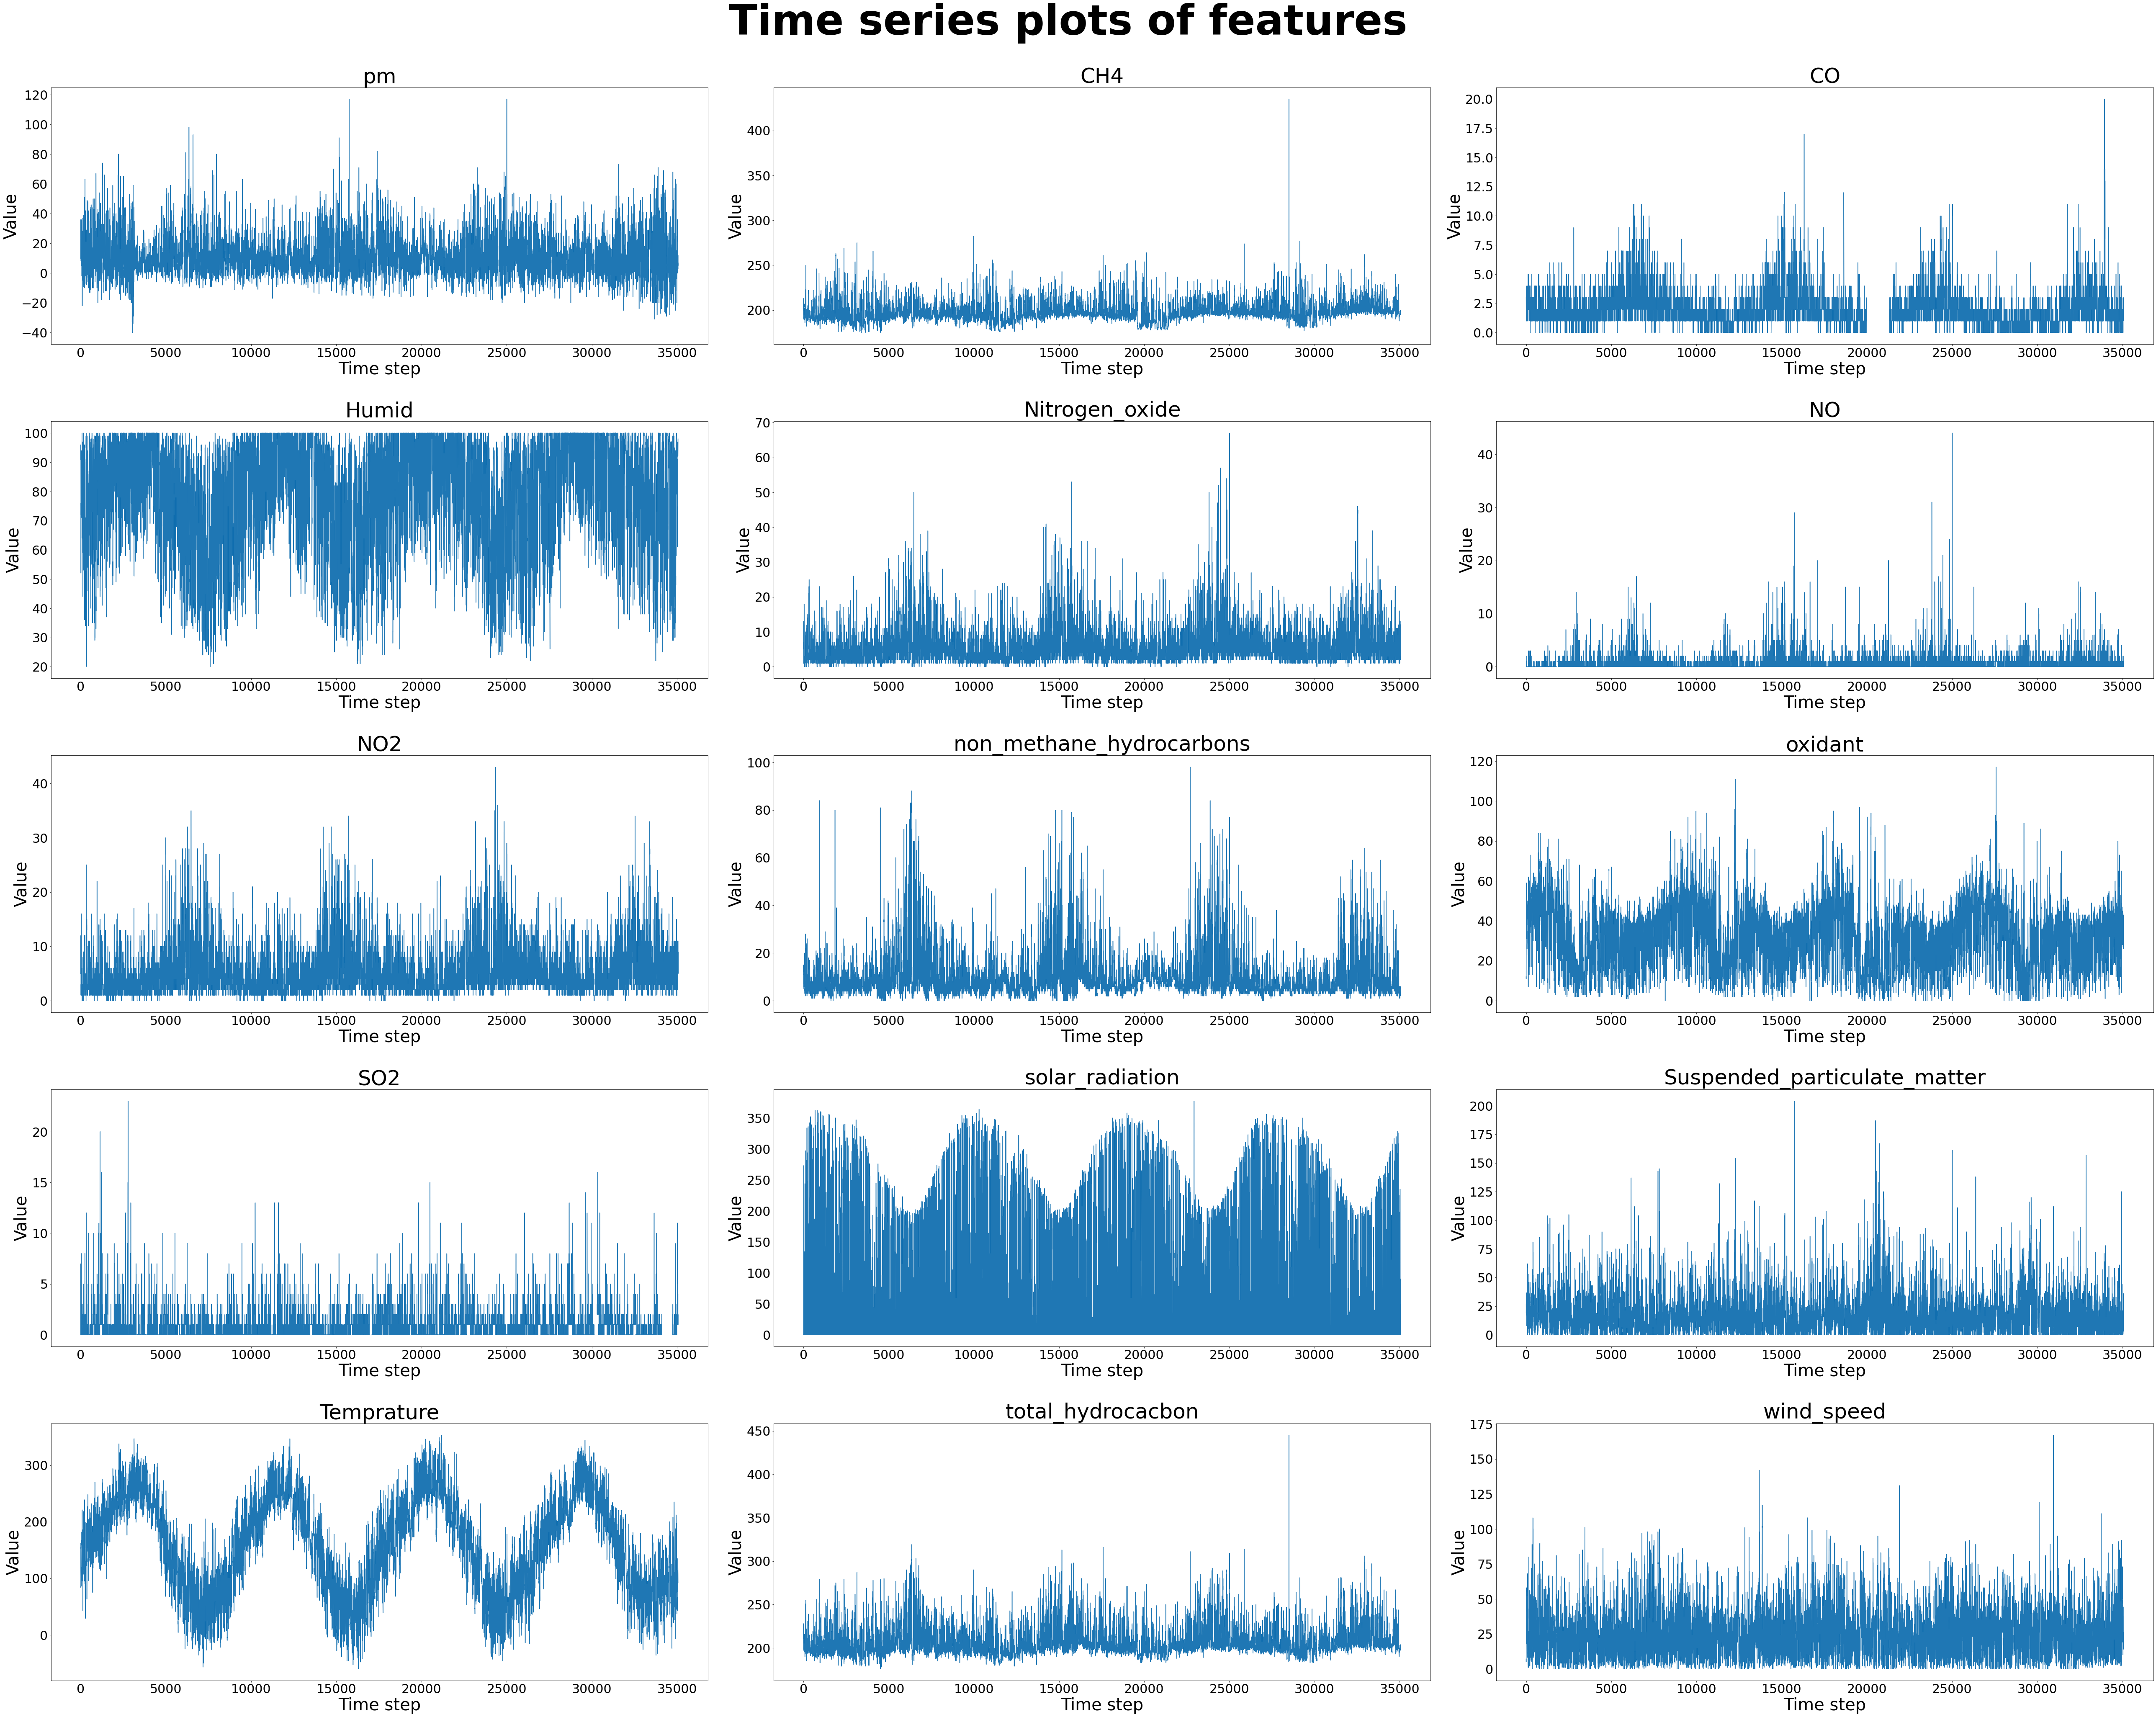

In [ ]:
plot_series(star_to_nan(df))

## Plot distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

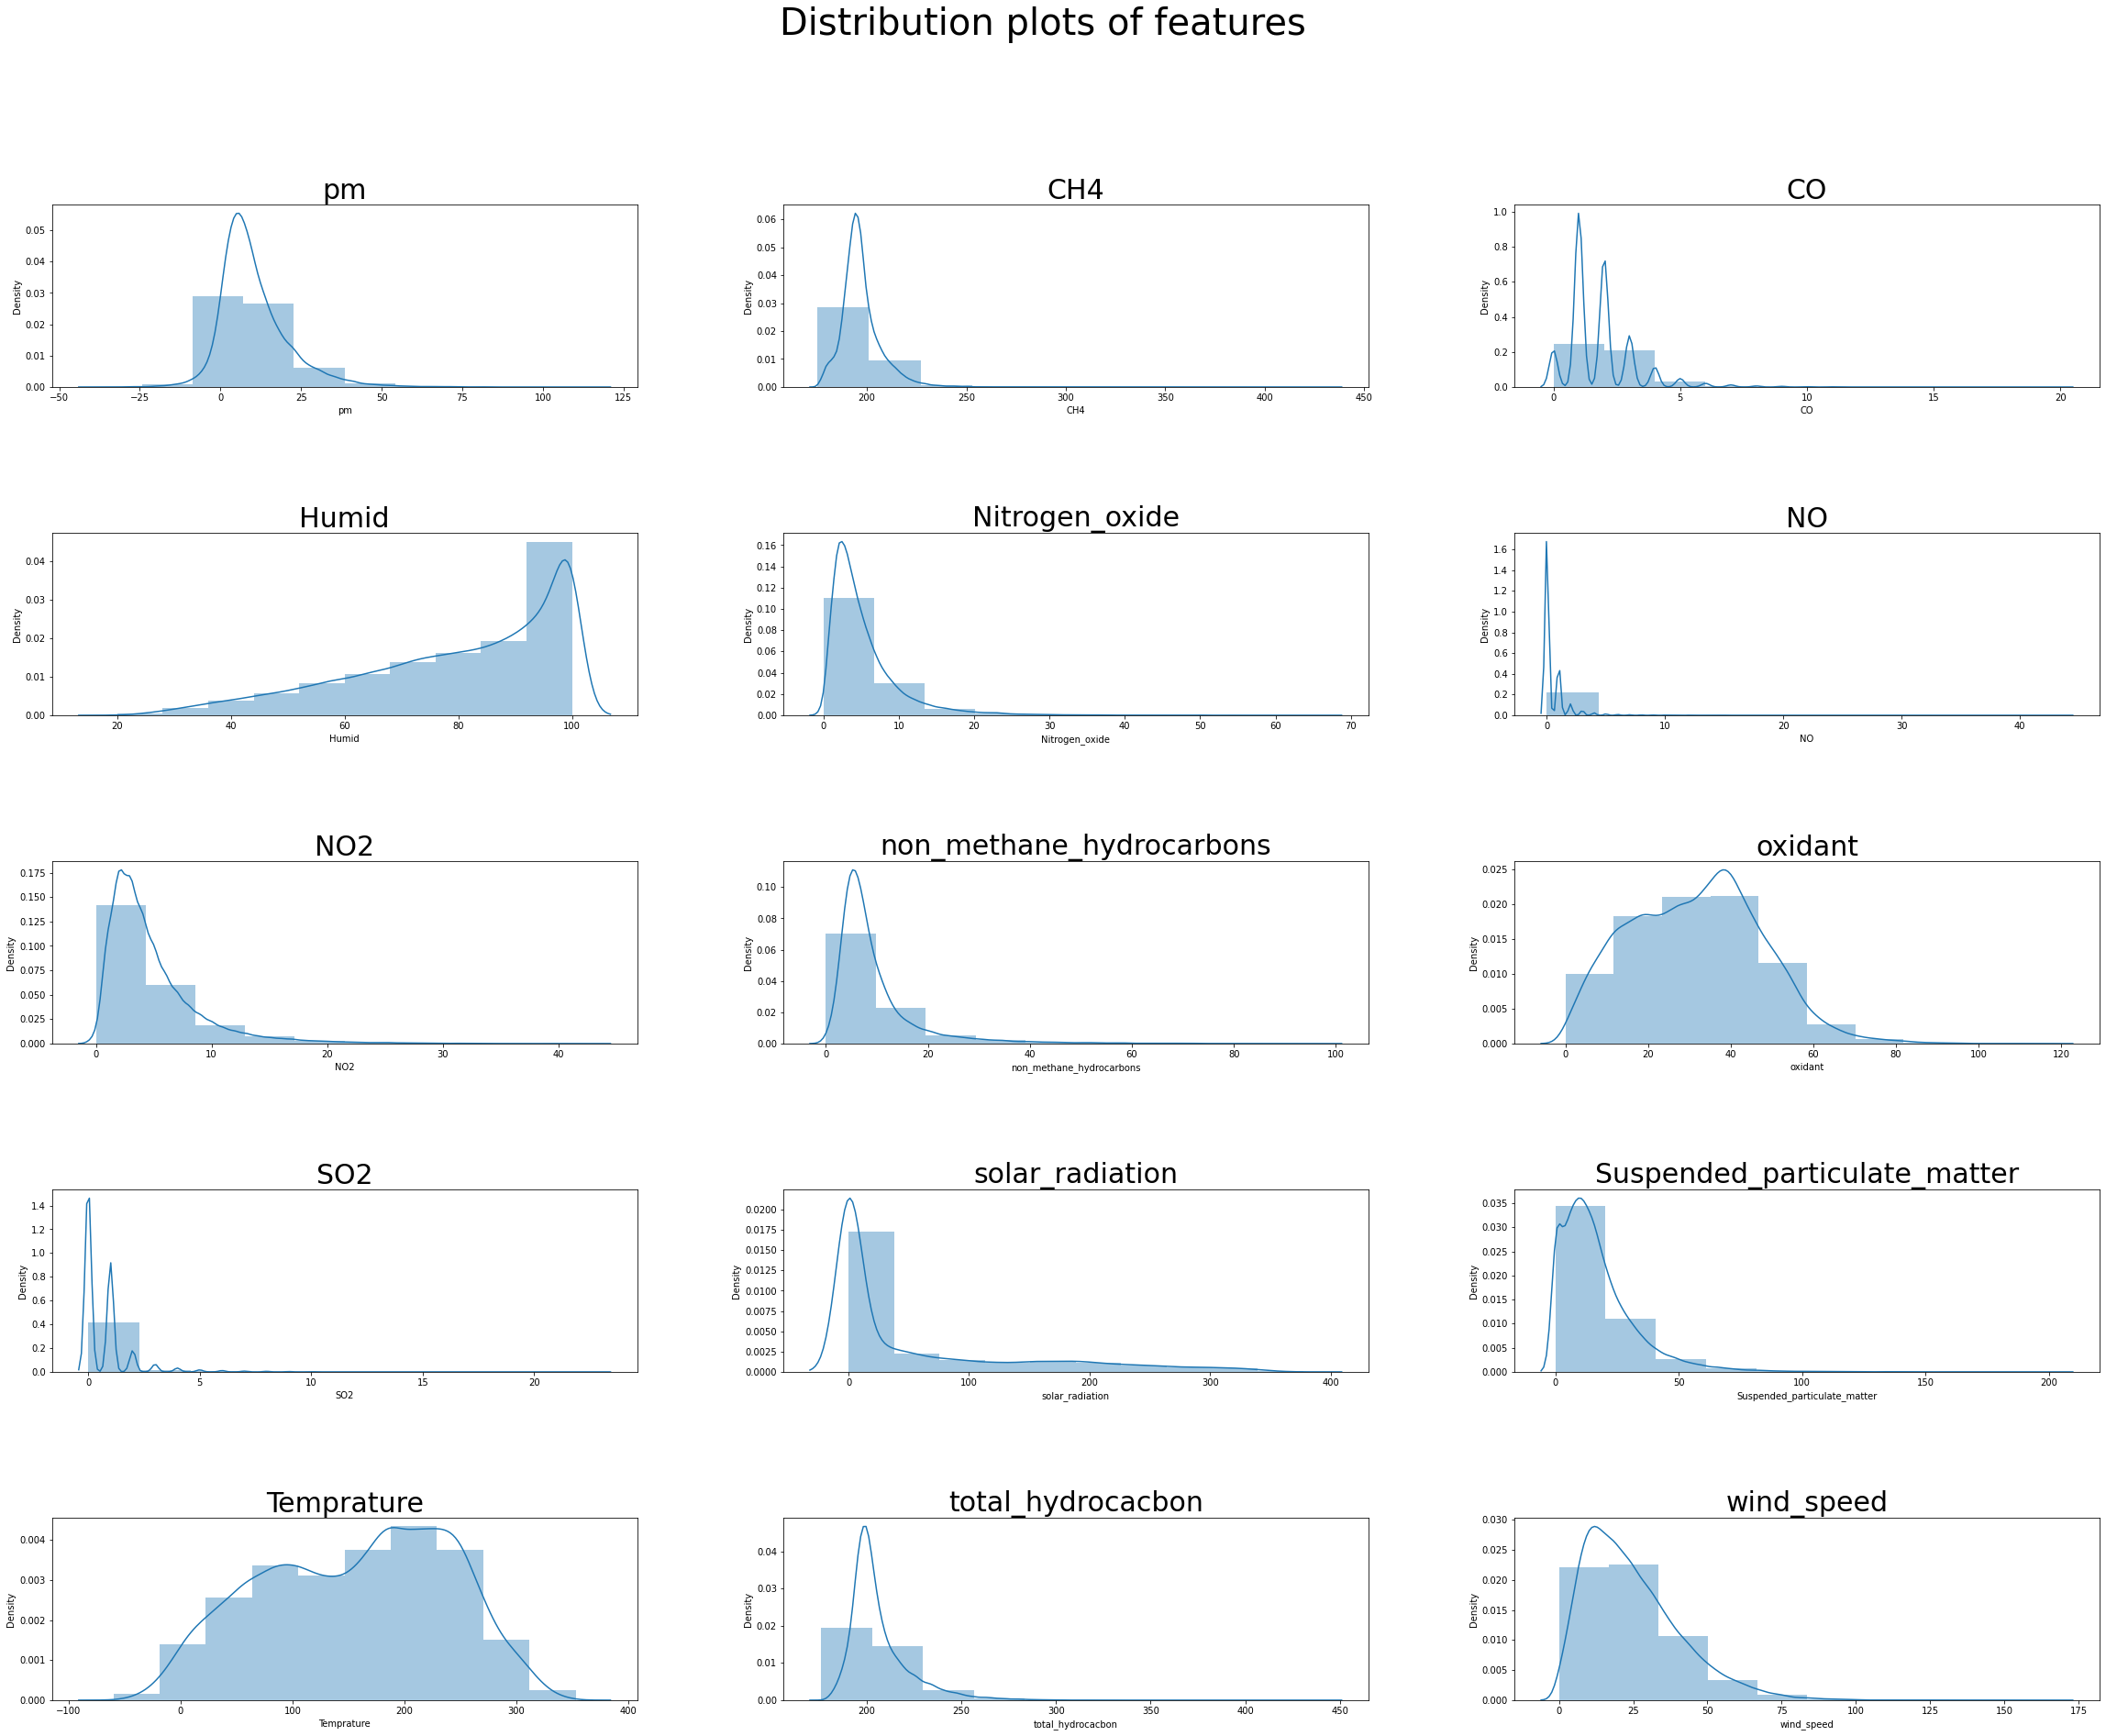

In [ ]:
plot_distribution(star_to_nan(df))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35064 entries, 0 to 35063
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          0 non-null      float64
 1   month                         0 non-null      float64
 2   date                          0 non-null      float64
 3   hour                          0 non-null      float64
 4   pm                            35064 non-null  object 
 5   wind_direct                   35064 non-null  object 
 6   CH4                           35064 non-null  object 
 7   CO                            35064 non-null  object 
 8   Humid                         35064 non-null  object 
 9   Nitrogen_oxide                35064 non-null  object 
 10  NO                            35064 non-null  object 
 11  NO2                           35064 non-null  object 
 12  non_methane_hydrocarbons      35064 non-null  object 
 13  o

# Preprocess pipeline

## Function to rearrange our columns

In [ ]:
def rearrange_columns(df):
  station = pd.DataFrame()
  features = ['pm', 'CH4', 'CO',
       'Humid', 'Nitrogen_oxide', 'NO', 'NO2', 'non_methane_hydrocarbons',
       'oxidant', 'SO2', 'Suspended_particulate_matter',
       'Temprature', 'total_hydrocacbon', 'wind_speed' , 'wind_direct'] 
  for feature in features:
    station[feature] = df[feature]
  return station

## Function to turn our columns into numerics

In [ ]:
def to_numeric(df):
  return df.apply(pd.to_numeric, errors='ignore')

## Function to split our data into train, dev, test sets

In [ ]:
#Split data 70-15-15
def split_data(df):
  length = len(df['pm'])
  train_df = df.iloc[0: int(length * 0.7)]
  dev_df = df.iloc[int(length * 0.7): int(length * 0.85)]
  test_df = df.iloc[int(length * 0.85):]

  train_df = train_df.reset_index(drop = True)
  dev_df = dev_df.reset_index(drop = True)
  test_df = test_df.reset_index(drop = True)
  return train_df, dev_df, test_df

## Function to turn negative pm indices into 0, and fill 0 points with averages

In [ ]:
def clean_pm(df):
  station = df.copy()
  station_pm = station['pm']
  new_df = pd.DataFrame()
  new_df['pm'] = station_pm
  new_df['pm'][pd.to_numeric(new_df['pm']) < 0] = 0
  new_df['pm'] = pd.to_numeric(new_df['pm'])
  for index, row in new_df.iterrows():
    if 6 <= index <= len(new_df) - 7:
      if row['pm'] == 0:
        new_df.iloc[index] = new_df['pm'].iloc[index-6:index+7].sum() / 12
  station['pm'] = new_df['pm']
  return station

## Function to handle missing values

In [ ]:
def fill_nan_numeric_column(column,index):
  upper_nan = 0
  lower_nan = 0
  non_nan = []
  for i in range(index - 6, index):
    if np.isnan(column[i]):
      upper_nan += 1
    else:
      non_nan.append(column[i])

    #print(i)
  for i in range(index + 1, index + 7):
    if np.isnan(column[i]):
      lower_nan += 1
    else:
      non_nan.append(column[i])
  if lower_nan <= 4 and upper_nan <= 4:
    column[index] = np.mean(non_nan)

In [ ]:
def fill_nan_categorical_column(column,index):
  upper_nan = 0
  lower_nan = 0
  non_nan = []
  for i in range(index - 6, index):
    if np.isnan(column[i]):
      upper_nan += 1
    else:
      non_nan.append(column[i])

    #print(i)
  for i in range(index + 1, index + 7):
    if np.isnan(column[i]):
      lower_nan += 1
    else:
      non_nan.append(column[i])
  if lower_nan <= 4 and upper_nan <= 4:
    column[index] = max([p[0] for p in statistics._counts(non_nan)])

In [ ]:
def handle_missing_values(df):
  station = df
  #Fill numeric data
  for feature in station.columns:
    station_feature = station[feature]
    new_df = pd.DataFrame()
    new_df[feature] = station_feature
    #new_df['pm'][pd.to_numeric(new_df['pm']) < 0] = 0
    new_df[feature] = pd.to_numeric(new_df[feature])
    for index, row in new_df.iterrows():
      if 6 <= index <= len(new_df) - 7:
        if np.isnan(row[feature]):
          if feature != "wind_direct":
            fill_nan_numeric_column(new_df[feature],index)
          else:
            fill_nan_categorical_column(new_df[feature],index)

    station[feature] = new_df[feature]
  
  for feature in station.columns[:15]:
    mean_value=station[feature].mean()
    # Replace NaNs in column S2 with the
    # mean of values in the same column
    station[feature].fillna(value=mean_value, inplace=True)
  
  for feature in station.columns[15:]:
    mode_value=station[feature].mode()[0]
    # Replace NaNs in column S2 with the
    # mean of values in the same column
    station[feature].fillna(value=mode_value, inplace=True)
  
  return station

## Function for one hot encoding

In [ ]:
def one_hot_encoding(df):
  one_hot = pd.get_dummies(df['wind_direct'], prefix = 'wind_direct')
  station = df.copy()
  encoded_df = station.join(one_hot)
  return encoded_df

## SSA Transformation

In [ ]:
class SSA():

    """
    Usage:
    ssa = SSA(tseries, window_len=1000) # param anh Hưng dùng 
    denoised = ssa.remove_noise(50) # param anh Hưng dùng

    ----
    tseries: time series of 1 feature, e.g. pm2.5
    denoised datatype: numpy array

    """

    def __init__(self, tseries, window_len, wcor=False):
        self.tseries = tseries
        self.num_time_step = len(tseries)
        self.window_len = window_len
        self._check_window_len()
        self.traj_matrix = self._build_trajectory_matrix()
        self.X_ele_list = self._get_elem_matrix()
        self.F_ele_list = self._get_F_ele()
        if wcor:
            self.wcor_matrix = self._build_w_corr_matrix()

    def _check_window_len(self):
        """
        Check if window length is valid
        """
        if 0 < self.window_len <= self.num_time_step // 2:
            return
        raise Exception("Illegal window length")

    def _build_trajectory_matrix(self):
        """
        Build trajectory matrix by stacking columns which values are from sub series with the specified  window length
        """
        return np.column_stack([self.tseries[i:i+self.window_len] for i in range(0, self.num_time_step - self.window_len + 1)])

    def _get_elem_matrix(self):
        """
        Decompose into elementary matrices using SVD
        """
        self.r = np.linalg.matrix_rank(self.traj_matrix)
        U, Sigma, V_T = np.linalg.svd(self.traj_matrix)
        X_elem = np.array([Sigma[i] * np.outer(U[:, i], V_T[i, :]) for i in range(self.r)])
        return X_elem

    def _matrix_to_tseries(self, X):
        """Convert trajectory matrix back to time series"""
        # Reverse the column ordering of X_i
        X_rev = X[::-1]
        # Full credit to Mark Tolonen at https://stackoverflow.com/a/6313414 for this one:
        return np.array([X_rev.diagonal(i).mean() for i in range(-X.shape[0]+1, X.shape[1])])

    def _get_F_ele(self):
        """Get elementary series"""
        return [self._matrix_to_tseries(X) for X in self.X_ele_list]

    def remove_noise(self, num_ele):
        """Ouput the denoised series using the first num_ele F series"""
        if num_ele > self.window_len:
            raise Exception(
                "Number of elements exceeds total number of elements")
        denoised = np.array([0 for i in range(self.num_time_step)])
        for i in range(num_ele):
            denoised = np.add(denoised, np.array(self.F_ele_list[i]))
        return denoised

    def plot_wcorr(self, min=None, max=None):
        """
        Just for testing
        Plots the w-correlation matrix for the decomposed time series.
        """
        if min is None:
            min = 0
        if max is None:
            max = self.window_len

        if self.wcor_matrix is None:
            self.wcor_matrix = self._build_w_corr_matrix()

        ax = plt.imshow(self.wcor_matrix)
        plt.xlabel(r"$\tilde{F}_i$")
        plt.ylabel(r"$\tilde{F}_j$")
        plt.colorbar(ax.colorbar, fraction=0.045)
        ax.colorbar.set_label("$W_{i,j}$")
        plt.clim(0, 1)

        # For plotting purposes:
        if max == self.window_len:
            max_rnge = self.window_len-1
        else:
            max_rnge = max

        plt.xlim(min-0.5, max_rnge+0.5)
        plt.ylim(max_rnge+0.5, min-0.5)



In [ ]:
def SSA_transform(df):
  df_segments = [train_df.iloc[i * 1000 : (i+1) * 1000 ] for i in range(math.ceil(len(train_df)/1000)) ]
  transformed_segments = []
  for segment in df_segments:
    station = segment.copy()  
    tseries = station['pm'].to_numpy()
    window_len = 250
    ssa = SSA(tseries, window_len, wcor=True)    
    transformed_series = ssa.remove_noise(50)
    transformed_series = pd.DataFrame(transformed_series, columns= ['pm'],index = station['pm'].index)
    station['pm'] = transformed_series
    transformed_segments.append(station)

  station = pd.concat(transformed_segments, ignore_index = True)
  return station

## Final Preprocess pipeline

In [ ]:
def preprocess_pipeline(df):
  train_df, dev_df, test_df = split_data(df)
  lst_cols = list(df.columns)
  lst_cols.remove('year')
  lst_cols.remove('month')
  lst_cols.remove('date')
  lst_cols.remove('hour')
  lst_cols.remove('wind_direct')
  lst_cols.append('wind_direct')

  for i in range(1,18):
    i = str(i) + ".0"
    one_hot_feature = "wind_direct_" + i
    lst_cols.append(one_hot_feature)

  star_to_nan_transformer = FunctionTransformer(star_to_nan)
  clean_pm_transformer = FunctionTransformer(clean_pm)
  rearrange_columns_transformer = FunctionTransformer(rearrange_columns)
  to_numeric_transformer = FunctionTransformer(to_numeric)
  handle_missing_values_transformer = FunctionTransformer(handle_missing_values)
  one_hot_transformer = FunctionTransformer(one_hot_encoding)
  
  num_pl = Pipeline(
      steps=[('star_to_nan', star_to_nan_transformer),
          ('clean_pm',clean_pm_transformer),
          ('rearrange_columns', rearrange_columns_transformer),
          ( "to_numeric", to_numeric_transformer),
          ('handle_missing_values', handle_missing_values_transformer),
          ("one_hot_encoding",one_hot_transformer)
      ], 
  )

  preprocessor = ColumnTransformer(
      transformers=[
          ('num', num_pl, list(df.columns))
      ]
  )

  train_result = preprocessor.fit_transform(train_df)
  train_result = pd.DataFrame(train_result, index=train_df.index,columns= lst_cols)
  train_result = SSA_transform(train_result)
  train_result = clean_pm(train_result)
  train_result.to_csv(path_or_buf = "/content/drive/MyDrive/chosen_data/train_df_ssa.csv" , sep = ",", index = False)

  dev_result = preprocessor.fit_transform(dev_df)
  dev_result = pd.DataFrame(dev_result, index=dev_df.index,columns= lst_cols)
  dev_result.to_csv(path_or_buf = "/content/drive/MyDrive/chosen_data/dev_df.csv" , sep = ",", index = False)

  test_result = preprocessor.fit_transform(test_df)
  test_result = pd.DataFrame(test_result, index=test_df.index,columns= lst_cols)
  test_result.to_csv(path_or_buf = "/content/drive/MyDrive/chosen_data/test_df.csv" , sep = ",", index = False)


  return train_result, dev_result, test_result


## Compare SSA vs non-SSA

In [ ]:
train_df, dev_df, test_df = preprocess_pipeline(df)

In [ ]:
train_df_nossa = pd.read_csv("/content/drive/MyDrive/data_chiba_processed/train_df.csv", sep = ",")
train_df_nossa = train_df_nossa

No handles with labels found to put in legend.


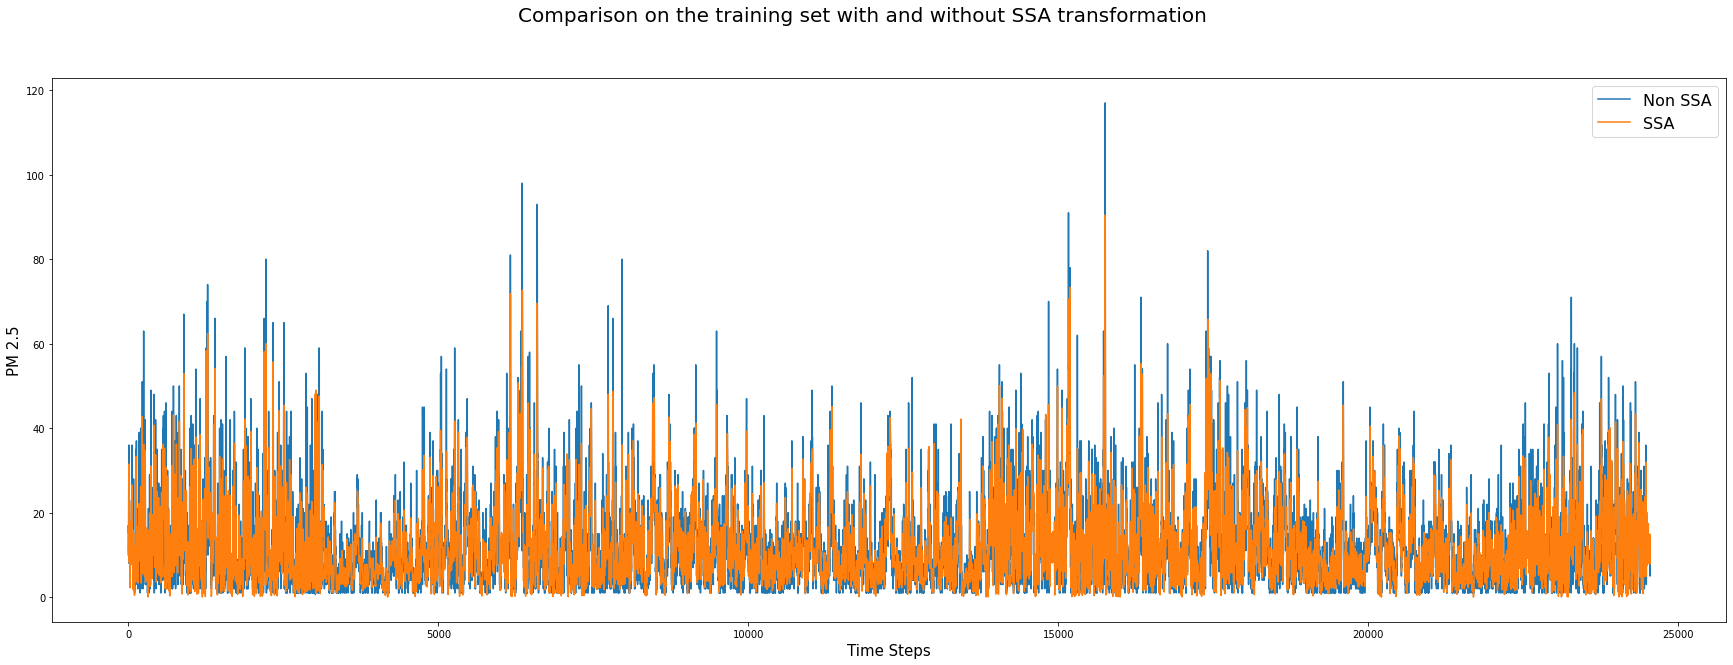

In [ ]:
non_ssa = train_df_nossa['pm'].tolist()
ssa =  train_df['pm'].tolist()


plt.figure(figsize=(30,10))
plt.legend(fontsize= 13)

plt.xlabel('Time Steps', fontsize = 15)
plt.ylabel('PM 2.5', fontsize = 15)

plt.plot(non_ssa, label = 'Non SSA') 

plt.plot(ssa, label = 'SSA') 

plt.legend(fontsize = 16)

plt.suptitle("Comparison on the training set with and without SSA transformation", fontsize = 20)

plt.savefig("/content/drive/MyDrive/project 1 images/ssa_comparison.png")
